[1]
[[3.]
 [3.]]


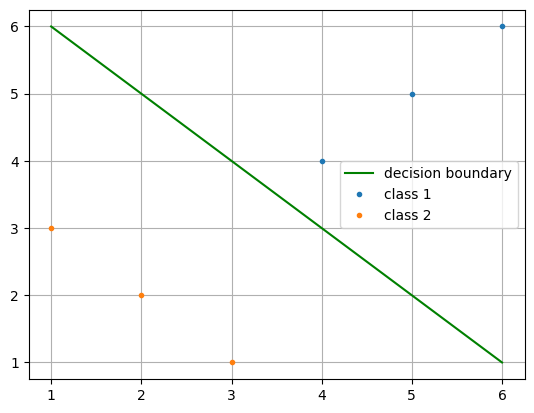

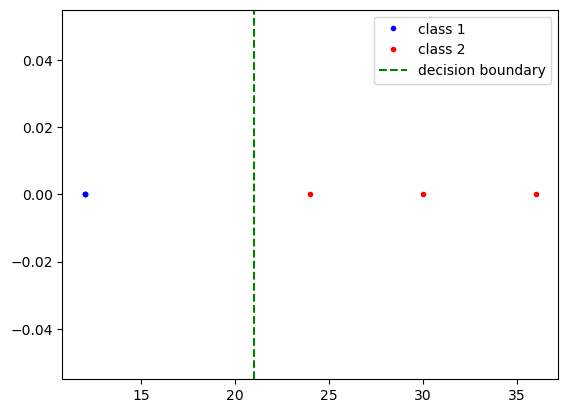

In [141]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV

X = np.array([[1,3], [2,2], [3,1], [4,4], [5,5], [6,6]])
y = np.array([0, 0, 0, 1, 1, 1])

clf = LinearDiscriminantAnalysis()
clf.fit(X, y)
print(clf.predict([[1, 8]]))
print(clf.coef_.T)

I = y == 1
J = y == 0

x_vals = np.linspace(np.min(X[:, 0]) , np.max(X[:, 0]), 100)
y_vals = -(clf.coef_[0][0] / clf.coef_[0][1]) * x_vals - clf.intercept_[0] / clf.coef_[0][1]

thresholds = np.dot(X, clf.coef_.T)

plt.plot(x_vals, y_vals, 'g', label="decision boundary")

plt.plot(X[I,0],X[I,1], '.', label = "class 1")
plt.plot(X[J,0],X[J,1],'.', label = "class 2")
plt.grid()

plt.legend()

plt.show()


plt.plot(thresholds[y==0], np.zeros_like(thresholds[y==0]), '.', color='blue', label="class 1")
plt.plot(thresholds[y==1], np.zeros_like(thresholds[y==1]), '.', color='red', label="class 2")


decision_boundary = (np.mean(thresholds[y == 0]) + np.mean(thresholds[y == 1])) / 2

plt.axvline(x=decision_boundary, linestyle = "--", color='green', label='decision boundary')

plt.legend()

plt.show()

In [142]:
A = pd.read_csv("bin-classifier-2.txt", header=None)
X = A.values[:, 0:2]
y = A.values[:, 2]

I = y == 1
J = y == 0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


st = StandardScaler()
X_train_std = st.fit_transform(X_train)

lda = LinearDiscriminantAnalysis()

param = {
    'solver': ['svd', 'lsqr', 'eigen'],
}

search = GridSearchCV(lda, param, cv = 10, scoring = 'f1')
search.fit(X_train_std, y_train)

bestModel = search.best_estimator_
pred = bestModel.predict(X_test)
prob = bestModel.predict_proba(X_test)
print(prob)
print(search.best_params_)
print(classification_report(y_test, pred))

# ----------------------------------------

param_lr = {
    'solver': ['lbfgs', 'liblinear', 'saga'],
}

lr = LogisticRegression(max_iter = 1000)

search_lr = GridSearchCV(lr, param_lr, cv = 10, scoring = 'f1')
search_lr.fit(X_train_std, y_train)

bestModel_lr = search_lr.best_estimator_
pred_lr = bestModel_lr.predict(X_test)
prob_lr = bestModel_lr.predict_proba(X_test)

print(prob_lr)
print(search_lr.best_params_)
print(classification_report(y_test, pred_lr))



[[0.86588625 0.13411375]
 [0.06512561 0.93487439]
 [0.44182529 0.55817471]
 [0.00214499 0.99785501]
 [0.94898896 0.05101104]
 [0.03050433 0.96949567]
 [0.00803041 0.99196959]
 [0.02401373 0.97598627]
 [0.07366101 0.92633899]
 [0.1784574  0.8215426 ]
 [0.00227625 0.99772375]
 [0.27414138 0.72585862]]
{'solver': 'svd'}
              precision    recall  f1-score   support

         0.0       1.00      0.29      0.44         7
         1.0       0.50      1.00      0.67         5

    accuracy                           0.58        12
   macro avg       0.75      0.64      0.56        12
weighted avg       0.79      0.58      0.54        12

[[0.81104526 0.18895474]
 [0.14306921 0.85693079]
 [0.51420537 0.48579463]
 [0.01404764 0.98595236]
 [0.90280148 0.09719852]
 [0.08211017 0.91788983]
 [0.03458712 0.96541288]
 [0.06744814 0.93255186]
 [0.15535719 0.84464281]
 [0.2561257  0.7438743 ]
 [0.01497549 0.98502451]
 [0.36052719 0.63947281]]
{'solver': 'liblinear'}
              precision    re

#### In task 3 we are faced with the problem where F-1 score for both models is the same. 
#### The reason for that is that the data set is too small, so both models predict at about the same probability. 
#### You can see the similar prediction probabilities through prob and prob_lr. For example, for linear discriminant analysis, 
#### probability to predict first value is 0.865. The probability for logistic regression to predict first value is 0.811.
#### These probabilites are almost exactly the same, hence accuracy, precision, recall and f-1 score are almost the same.
  